Homework 5
====
#### CHE 116: Numerical Methods and Statistics
Prof. Andrew White

Version 1.1 (2/9/2016)

----

1. Python Practice (20 Points)
====
Answer the following problems in Python

1. [4 points] Using Numpy, create the first 20 powers of 2. What is 2^10? What about 2^20? What's the pattern?
2. [4 points] Using a `for` loop, sum integers from 1 to 100 and `break` if your sum is greater than 200. Print the integer which causes your sum to exceed 200.
3. [4 points] Define a function which takes in $n$ and $k$ and returns the number of permutations of $n$ objects in a sequence of length $k$. Don't forget to add a docstring!
4. [8 points] You're making post-cards for the Rochester Animal Shelter. They have 30 distinct cats and you can arrange them into a line. Each ordering of cats is considered a different post-card. Each post-card as the same number of cats in it. What's the smallest number of cats that should be in each post-card to achieve at least one million unique post-cards? Use a `while` loop, a break statement, and your function from the previous question. You must use python tutor on this problem to receive full credit

### 1.1 Answer

In [18]:
import numpy as np
ints = np.arange(1,21)
pows = 2**ints
print(pows)
print(pows[9], pows[19])

[      2       4       8      16      32      64     128     256     512
    1024    2048    4096    8192   16384   32768   65536  131072  262144
  524288 1048576]
1024 1048576


$$2^{10} \approx 10^3$$

$$2^{20} \approx 10^6$$

$$2^{10n} \approx 10^{3n}$$

### 1.2 Answer

In [19]:
sum = 0
for i in range(1, 100):
    sum += i
    if sum > 200:
        print(i, sum)
        break

20 210


### 1.3 Answer

In [20]:
from scipy.misc import factorial

def fxn(n, k):
    '''Computes the number of permutations of n objects in a k-length sequence.
    Args: 
        n: The number of objects
        k: The sequence length
    Retunrs:
        The number of permutations of fixed length.
    '''
    return factorial(n) / factorial(n - k)

### 1.4 Answer

In [24]:
cats = 1
while fxn(n=30, k=cats) < 10**6:
    cats += 1
print(cats)

5


2. Watching Youtube with the Geometric Distribution (15 Points)
====

Write what quantity the question asks for symbolically, write the equation you need to compute symbolically (if necessary) and compute your answer in Python. 

1. You accidentally open youtube while doing your homework. After watching one video, you find another interesting video you must watch with probability 25%. Define the sample space and define success to reflect a geometric distribution. 

2. What's the probability that you will return after watching exactly one video?

3. What's the probability that you will return after watching exactly two videos?

4. Your friend wants to know when you will get back to homework. You explain the sample space is unbounded, but you guarantee there is a 99% chance you will return to your homework after how many videos? You must use python tutor on your loop to receive full credit.

5. What is the expected number of videos you will watch? You may use any method to compute this.

### 2.1 Answer

The sample space is $[1, \infty]$ and success is not watching another video and returning to your homework.

### 2.2 Answer

$$P(1) = 0.75$$

### 2.3 Answer

$$P(2) = 0.75\times 0.25 = 0.1874$$

In [25]:
0.75 * 0.25

0.1875

### 2.4 Answer

$$P(n < x) \geq 0.9$$

In [28]:
gsum = 0
n = 0
p = 0.75
while gsum < 0.99:
    n += 1
    gsum += (1 - p)**(n - 1) * p
print(n, gsum)

4 0.99609375


You will return after watching the 4th video

### 2.5 Answer

$$E[N] = \frac{1}{p} = \frac{4}{3}$$

3. Living Expenses (6 Points)
====

The per-capita (expected) income in the US is \$27,500 and its standard deviation is \$15,000. Assuming the normal distribution, answer the following questions. You may use scipy stats for all of these but you must use Z values.

1. First, let's check our assumption of normality. What is $P(x < \$0)$? Why does this matter for the normality assumption?
2. What's the probability of making over the starting salary of a chemical engineer, \$67,000? Does this make you think our assumption of normality is correct?
3. According to this distribution, how much money would you need to be in the top 1% of incomes?

### 3.1 Answer
$$\DeclareMathOperator{\erf}{erf}$$

$$Z = \frac{0 - 27,500}{15,000}$$
   
$$P(-\infty < x < 0)$$

In [56]:
from scipy import stats as ss

mu = 27500
sig = 15000

Z = (0 - mu) / sig

print(ss.norm.cdf(Z))

0.0333765075848


The assumption is OK, only 3% of our probability is in "impossible" values of negative numbers

### 3.2 Answer

$$\int_{$67,000}^{\infty} \cal{N}(\$27500, \$15000)$$

In [57]:
Z = (67000 - mu) / sig
print(1 - ss.norm.cdf(Z))

0.00422756606928


The probability is 0.4%. It appears this is a bad model since income is much more spread than this.

### 3.3 Answer

We're trying to find $a$ such that $$P(a < x < \infty) = 0.99$$ 

In [64]:
ss.norm.ppf(0.99, scale=sig, loc=mu)

62395.218110612608

The top 1% of earners is anyone above $62,395

4. The Excellent Retirement Simulator - Deterministic (20 Points)
====

We're going to write a program to discover how much to save in our retirement accounts. You are going to start with $P$ dollars, your principal. You invest in low-cost index funds which have an expected return of 5% (your principal is 105% of last years value). To live after your retirement, you withdraw \$30,000 per year. Complete the following tasks:

1. Write a function which takes in a principal, $P$, maturation rate of $r$, and withdrawl amount of $W$. It returns the amount of money remaining. Withdrawl occurs before maturation. Using your function, with a principal of \$250,000 and the numbers given above, how much money remains after 1 year? Call this function annual.

2. Write a new function called terminator which takes in $P$, $r$ and $W$. It should use your annual function and a for loop. It returns the number of years before your principal is gone and you have no more retirement money. Since you're using a for loop, you should have some upper bound. Let's use 50 for that upper bound. To test your method, you should get 11 years using the numbers from part 1.

3. Make a graph of principal vs number of years. You should use a for loop, not numpy, since your functions aren't built for numpy arrays. Your principals should run from \$100,000 to \$500,000.

4. Make your terminator (for this part only) have an upper bonud for 1000 years. You are a vampire. Make a plot from \$100,000 to \$750,000. How much money do you need in retirement as a vampire?

In [7]:
def annual(P, r=0.05, W=30000):
    '''Computes the change in principal after one year
    
    Args:
        P: The principal - amount of money at the beginning of the year
        r: The rate of return from principal
        W: The amount withdrawn
    Returns:
        The new principal'''
    P -= W
    P *= (r + 1)
    return P

def terminator(P, r=0.05, W=30000, upper_limit=50):
    '''Finds the number of years before the principal is exhausted.
    
    Args:
        P: The principal - amount of money at the beginning of the year
        r: The rate of return from principal
        W: The amount withdrawn
        upper_limit: The maximum iterations before giving up.
    Returns:
        The new principal'''
    for i in range(upper_limit):
        if(P < 0):
            break
        P = annual(P, r, W)
    return i

terminator(250000)

11

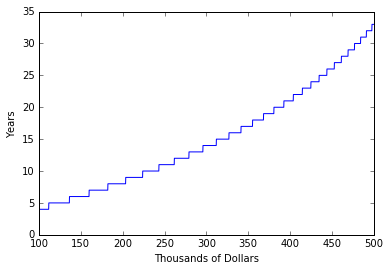

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

ps = [i / 1000. for i in range(10**5, int(5 * 10**5), 100)]
ys = [terminator(p * 1000) for p in ps]


plt.plot(ps, ys)
plt.xlabel('Thousands of Dollars')
plt.ylabel('Years')

plt.show()

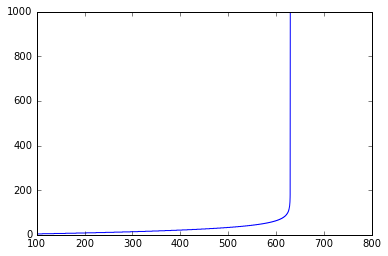

In [16]:
ps = [i / 1000. for i in range(10**5, int(7.5 * 10**5), 100)]
ys = [terminator(p * 1000, upper_limit=1000) for p in ps]

plt.plot(ps, ys)

plt.show()

5. The Excellent Retirement Simulator - Stochastic (9 Points)
====

Rewrite your annual function to sample random numbers. Youur investment rate of return (maturation rate) should be sampled from a normal distribution with standard deviation 0.03 and mean 0.05. Your withdrawl should come from a normal distribution with mean \$30,000 and standard deviation \$10,000. Call your new annual, s_annual and your new terminator s_terminator. Answer the following questions:

1. Previously you calculated you can live for 11 years off of a principal of \$250,000. Using your new terminator and annual functions, make a histogram for how many years you can live off of \$250,000. Use 1000 samples.

2. Create a function which takes in a principal and a target number of years for the principal to last. It should return what fraction of terminator runs succeed in lasting that many years. For example, a principal of \$250,000 should have about 55%-60% success with 10 years.

3. Using any method you would like (e.g., trial and error or plotting), what should your principal be to ensure retirement for 25 years in 95% of the samples?

In [33]:
from scipy import stats as ss

def s_annual(P, r=0.05, W=30000, sig_r=0.03, sig_W=10000):
    '''Computes the change in principal after one year with stochastic 
    
    Args:
        P: The principal - amount of money at the beginning of the year
        r: The rate of return from principal
        W: The amount withdrawn
    Returns:
        The new principal'''
    P -= ss.norm.rvs(size=1,scale=sig_W, loc=W)
    P *= (ss.norm.rvs(size=1, scale=sig_r, loc=r) + 1)
    return P

def s_terminator(P, r=0.05, W=30000, upper_limit=50):
    for i in range(upper_limit):
        if(P < 0):
            break
        P = s_annual(P, r, W)
    return i

samples = []
for i in range(1000):
    samples.append(s_terminator(2.5 * 10**5))

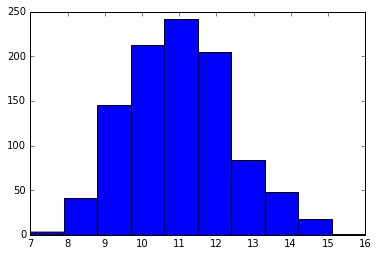

In [35]:
plt.hist(samples)
plt.show()

In [38]:
def s_threshold(P, y):
    '''Returns the fraction of times the principal P lasts longer than y'''
    success = 0
    for i in range(1000):
        if s_terminator(P) > y:
            success += 1
    return success / 1000

s_threshold(2.5 * 10**5, 10)

0.577

In [42]:
p = np.linspace(1 * 10**5, 10 * 10**5, 200)
for pi in p:
    if s_threshold(pi, 25) > 0.95:
        print(pi)
        break

520603.015075


In [1]:
import random

In [2]:
import scipy.stats

In [3]:
scipy.stats.geom?